In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
data_path = "/content/drive/MyDrive/MIDS_main/DS210/Data/epi_r.csv"
df = pd.read_csv(data_path)
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(20052, 680)

In [6]:
# df.columns

import textwrap

cols = list(df.columns)
# print(textwrap.fill(", ".join(cols), width=120))

# how many columns displayed per row
n = 10
line_break_every = 25

for i in range(0, len(cols), n):
    print(", ".join(cols[i:i+n]))

    # add blank lines after every `line_break_every` rows
    if (i // n + 1) % line_break_every == 0:
        print("\n" * 3)  # 3 blank lines, adjust as you like

title, rating, calories, protein, fat, sodium, #cakeweek, #wasteless, 22-minute meals, 3-ingredient recipes
30 days of groceries, advance prep required, alabama, alaska, alcoholic, almond, amaretto, anchovy, anise, anniversary
anthony bourdain, aperitif, appetizer, apple, apple juice, apricot, arizona, artichoke, arugula, asian pear
asparagus, aspen, atlanta, australia, avocado, back to school, backyard bbq, bacon, bake, banana
barley, basil, bass, bastille day, bean, beef, beef rib, beef shank, beef tenderloin, beer
beet, bell pepper, berry, beverly hills, birthday, biscuit, bitters, blackberry, blender, blue cheese
blueberry, boil, bok choy, bon appétit, bon app��tit, boston, bourbon, braise, bran, brandy
bread, breadcrumbs, breakfast, brie, brine, brisket, broccoli, broccoli rabe, broil, brooklyn
brown rice, brownie, brunch, brussel sprout, buffalo, buffet, bulgaria, bulgur, burrito, butter
buttermilk, butternut squash, butterscotch/caramel, cabbage, cake, california, calvados, camb

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [8]:
# duplicate columns
col_counts = pd.Series(df.columns, name="col").value_counts()
dupe_names = col_counts[col_counts > 1]
print("Duplicate column names:", dupe_names.index.tolist())
dupe_names

Duplicate column names: []


,count
col,


In [9]:
# Top 20 columns with the most missing values
df.isna().sum().sort_values(ascending=False).head(20)

,0
fat,4183
protein,4162
sodium,4119
calories,4117
parsnip,0
party,0
pasadena,0
passion fruit,0
passover,0
pasta,0


In [10]:
# different way of finding most missing values
miss = df.isna().sum()
miss[miss > 0].sort_values(ascending=False).head(20)

,0
fat,4183
protein,4162
sodium,4119
calories,4117


# Re Do above after row duplicates have been addressed

### Top 20 columns with the most missing values

In [11]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Number of unique values for each column
df.nunique()


,0
title,17736
rating,8
calories,1858
protein,282
fat,326
...,...
cookbooks,2
leftovers,2
snack,2
snack week,2


In [13]:
df['rating'].value_counts()

,count
rating,
4.375,8019
3.750,5169
5.000,2719
0.000,1836
3.125,1489
2.500,532
1.250,164
1.875,124


In [14]:
df.sample(5).T


,11966,15144,2004,6617,19573
title,Butternut Squash Soup with Cider Cream,Applesauce Cake with Penuche Frosting,Spiced Honey Cake With Cream Cheese Frosting,Herbed Tomato Soup with Pasta,"Strawberry, Lime and Champagne Cocktail"
rating,4.375,2.5,4.375,2.5,3.75
calories,241.0,358.0,639.0,194.0,NaN
protein,5.0,3.0,7.0,6.0,NaN
fat,12.0,12.0,35.0,1.0,NaN
...,...,...,...,...,...
cookbooks,0.0,0.0,0.0,0.0,0.0
leftovers,0.0,0.0,0.0,0.0,0.0
snack,0.0,0.0,0.0,0.0,0.0
snack week,0.0,0.0,0.0,0.0,0.0


In [15]:
def check_data_quality(df):
    # Store initial data quality metrics
    quality_report = {
        'missing_values': df.isnull().sum().to_dict(),
        'duplicates': df.duplicated().sum(),
        'total_rows': len(df),
        'memory_usage': df.memory_usage().sum() / 1024**2  # in MB
    }
    return quality_report

In [16]:
check_data_quality(df)

{'missing_values': {'title': 0,
  'rating': 0,
  'calories': 4117,
  'protein': 4162,
  'fat': 4183,
  'sodium': 4119,
  '#cakeweek': 0,
  '#wasteless': 0,
  '22-minute meals': 0,
  '3-ingredient recipes': 0,
  '30 days of groceries': 0,
  'advance prep required': 0,
  'alabama': 0,
  'alaska': 0,
  'alcoholic': 0,
  'almond': 0,
  'amaretto': 0,
  'anchovy': 0,
  'anise': 0,
  'anniversary': 0,
  'anthony bourdain': 0,
  'aperitif': 0,
  'appetizer': 0,
  'apple': 0,
  'apple juice': 0,
  'apricot': 0,
  'arizona': 0,
  'artichoke': 0,
  'arugula': 0,
  'asian pear': 0,
  'asparagus': 0,
  'aspen': 0,
  'atlanta': 0,
  'australia': 0,
  'avocado': 0,
  'back to school': 0,
  'backyard bbq': 0,
  'bacon': 0,
  'bake': 0,
  'banana': 0,
  'barley': 0,
  'basil': 0,
  'bass': 0,
  'bastille day': 0,
  'bean': 0,
  'beef': 0,
  'beef rib': 0,
  'beef shank': 0,
  'beef tenderloin': 0,
  'beer': 0,
  'beet': 0,
  'bell pepper': 0,
  'berry': 0,
  'beverly hills': 0,
  'birthday': 0,
  'bis

Missing values:

Columns like calories, protein, fat, sodium are missing for ~20% of

*   Columns like calories, protein, fat, sodium are missing for ~20% of rows (~4k out of 20k).


Duplicates:

*   1801 duplicate rows. That’s ~9% of the dataset — worth checking if you want to drop them
*   List item ksdfjkalsdf;asdf



In [ ]:
# remove exact duplicate rows (across all columns)
# 0) ensure no duplicate column names (again)
# df = df.loc[:, ~df.columns.duplicated(keep="first")]

# 1) drop exact duplicate rows
df_nodup = df.drop_duplicates().reset_index(drop=True)

# 2) top 20 columns with most missing (counts + %)
miss = df_nodup.isna().sum()
missing_top = (
    miss[miss > 0]
    .sort_values(ascending=False)
    .head(20)
    .to_frame("n_missing")
)
missing_top["pct_missing"] = (missing_top["n_missing"] / len(df_nodup) * 100).round(2)
missing_top


,n_missing,pct_missing
fat,3801,20.83
protein,3781,20.72
sodium,3750,20.55
calories,3749,20.54


In [18]:
# how many rows missing data in fat, protein, sodium, and calories columns.
# Also,how many of those rows are missing more than 1 of those columns, and 2

cols = ["calories", "protein", "fat", "sodium"]

# Boolean mask of missingness for just those columns
miss_mask = df_nodup[cols].isna()

# Missing count per row across the 4 columns
miss_count = miss_mask.sum(axis=1)

n_rows = len(df_nodup)

any_missing = int((miss_count >= 1).sum())
more_than_1  = int((miss_count > 1).sum())
exactly_2    = int((miss_count == 2).sum())

print(f"Rows (deduped) with ≥1 missing in {cols}: {any_missing} ({any_missing/n_rows:.2%})")
print(f"Rows with >1 missing in {cols}:          {more_than_1} ({more_than_1/n_rows:.2%})")
print(f"Rows with exactly 2 missing in {cols}:   {exactly_2} ({exactly_2/n_rows:.2%})")

# full distribution (how many rows have 0,1,2,3,4 missing among the 4)
dist = (miss_count.value_counts().sort_index()
        .rename_axis("#missing")
        .to_frame("n_rows"))
dist["pct"] = (dist["n_rows"] / n_rows * 100).round(2)
display(dist)


Rows (deduped) with ≥1 missing in ['calories', 'protein', 'fat', 'sodium']: 3805 (20.85%)
Rows with >1 missing in ['calories', 'protein', 'fat', 'sodium']:          3778 (20.70%)
Rows with exactly 2 missing in ['calories', 'protein', 'fat', 'sodium']:   29 (0.16%)


,n_rows,pct
#missing,,
0,14446,79.15
1,27,0.15
2,29,0.16
4,3749,20.54


In [19]:
# df[df['no sugar added'] == 1.0]
df_nodup[df_nodup['no sugar added'] == 1.0]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,"Green Bean, Red Onion, and Roast Potato Salad ...",4.375,351.0,6.0,19.0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,Asian Steak Topped with Bell Pepper Stir-Fry,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Roasted Sweet-Potato Spears with Bacon Vinaigr...,4.375,376.0,7.0,18.0,604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,Fontina Mac with Squash and Sage,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18228,Roasted and Raw Carrot Salad with Avocado and ...,3.125,293.0,4.0,27.0,647.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18229,Cabbage Soup with Apples and Thyme,4.375,303.0,10.0,15.0,139.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18231,Spinach with Chickpeas and Fried Eggs,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18237,"Potato Galettes with Crab, Shrimp, and Asparagus",4.375,418.0,16.0,30.0,641.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
nutri_keywords = ["cal", "protein", "fat", "sodium", "sugar", "carb", "fiber"]
# nutrition_cols = [c for c in df.columns if any(k in c.lower() for k in nutri_keywords)]
nutrition_cols = [c for c in df_nodup.columns if any(k in c.lower() for k in nutri_keywords)]
print("Nutrition columns:", nutrition_cols)
print(nutrition_cols)


Nutrition columns: ['calories', 'protein', 'fat', 'sodium', 'california', 'calvados', 'fat free', "father's day", 'green onion/scallion', 'high fiber', 'low cal', 'low carb', 'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'mezcal', 'no sugar added', 'scallop', 'sugar conscious', 'sugar snap pea', 'tropical fruit']
['calories', 'protein', 'fat', 'sodium', 'california', 'calvados', 'fat free', "father's day", 'green onion/scallion', 'high fiber', 'low cal', 'low carb', 'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'mezcal', 'no sugar added', 'scallop', 'sugar conscious', 'sugar snap pea', 'tropical fruit']


In [21]:
df = df_nodup.copy()

Classify all the tags into groups

In [ ]:
# Identify tag columns (binary flags) automatically

# 1) Non-tag columns you want to keep out of tagging
non_tag_cols = {"title", "rating", "calories", "protein", "fat", "sodium"}

# 2) Robust binary detector
def is_binary_series(s: pd.Series) -> bool:
    s = s.dropna()
    if s.empty:
        return False
    # Unique values as Python scalars (handle strings, ints, bools)
    uniques = set(pd.unique(s))
    # Normalize strings like "0"/"1"
    norm = set()
    for v in uniques:
        if isinstance(v, str) and v.strip() in {"0", "1"}:
            norm.add(int(v.strip()))
        elif isinstance(v, (np.integer, int, bool, np.bool_)):
            norm.add(int(v))
        else:
            norm.add(v)
    return norm.issubset({0, 1}) and len(norm) <= 2

# 3) Collect tag columns (binary flags) safely
tag_cols = []
for c in df.columns:
    if c in non_tag_cols:
        continue
    try:
        if is_binary_series(df[c]):
            tag_cols.append(c)
    except Exception:
        # skip any weird columns
        pass

# Fallback: if nothing detected, assume all non_tag columns are tags (last resort)
if not tag_cols:
    tag_cols = [c for c in df.columns if c not in non_tag_cols]

print(f"Detected {len(tag_cols)} tag columns. Example: {tag_cols[:10]}")


Detected 674 tag columns. Example: ['#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond']


In [ ]:
# --- Manual overrides (to fix common misclassifications) ---
manual_overrides = {
    "sugar snap pea": "ingredient_other",
    "scallop": "ingredient_other",
    "alcoholic": "ingredient_other",
    "healdsburg": "ingredient_other",  # small location misclassified before
}

# --- Regex rules for categories ---
rules = {
    "nutrition": [
        r"\bcalories?\b", r"\bprotein\b", r"\bfat\b", r"\bsodium\b",
        r"\blow\s+cal\b", r"\blow\s+fat\b", r"\blow\s+sugar\b", r"\blow\s+carb\b",
        r"\blow\s+cholesterol\b", r"\blow\s+sodium\b", r"\bno\s+sugar\s+added\b",
        r"\bhigh\s+fiber\b", r"\bfat\s+free\b", r"\bhealthy\b", r"\bsugar\s+conscious\b",
        r"\blow/no\s+sugar\b", r"\bquick\s+and\s+healthy\b"
    ],
    "diet_lifestyle": [
        r"\bvegan\b", r"\bvegetarian\b", r"\bpescatarian\b", r"\bpaleo\b",
        r"\bkosher(\s+for\s+passover)?\b", r"\borganic\b", r"\bdairy\s+free\b",
        r"\bwheat/gluten-free\b", r"\bpeanut\s+free\b", r"\btree\s+nut\s+free\b",
        r"\bsoy\s+free\b", r"\bkidney\s+friendly\b"
    ],
    "method_equipment": [
        r"\bgrill\b", r"\bbake\b", r"\broast\b", r"\bdeep[\s-]?fry\b",
        r"\bfry\b", r"\bslow\s+cooker\b", r"\bmicrowave\b", r"\bstir-?fry\b",
        r"\bsteam\b", r"\bblender\b", r"\bpan-?fry\b", r"\bmandoline\b", r"\bbroil\b"
    ],
    "occasion_event": [
        r"\bthanksgiving\b", r"\bchristmas\b", r"\bbirthday\b", r"\bparty\b",
        r"\bholiday\b", r"\beaster\b", r"\bpassover\b", r"\bnew\s+year\b",
        r"\bhanukkah\b", r"\bpicnic\b", r"\bwedding\b", r"\bsuper\s+bowl\b",
        r"\bfriendsgiving\b", r"\bshower\b", r"\bvalentine\b", r"\bramadan\b",
        r"\bsukkot\b", r"\brosh\s+hashanah\b", r"\bpurim\b"
    ],
    "cuisine_location": [
        # US states and regions
        r"\b(alabama|alaska|arizona|arkansas|california|colorado|connecticut|delaware|florida|georgia|hawaii|idaho|illinois|indiana|iowa|kansas|kentucky|louisiana|maine|maryland|massachusetts|michigan|minnesota|mississippi|missouri|montana|nebraska|nevada|new hampshire|new jersey|new mexico|new york|north carolina|north dakota|ohio|oklahoma|oregon|pennsylvania|rhode island|south carolina|south dakota|tennessee|texas|utah|vermont|virginia|washington|west virginia|wisconsin|wyoming)\b",
        # Countries and cuisines
        r"\b(italy|france|mexico|china|japan|korea|israel|germany|england|ireland|spain|philippines|dominican republic|australia|cuba|peru|egypt|jamaica|haiti)\b",
        # Cities
        r"\b(los angeles|san francisco|new orleans|miami|chicago|boston|atlanta|seattle|houston|brooklyn|las vegas|dallas|detroit)\b",
        # Generic cuisine
        r"\bcuisine\b"
    ]
}

# --- Classifier function ---
def classify_tag(tag: str):
    # manual overrides first
    if tag in manual_overrides:
        return manual_overrides[tag], "manual_override"

    # check regex rules in priority order
    for category, patterns in rules.items():
        for pat in patterns:
            if re.search(pat, tag, flags=re.IGNORECASE):
                return category, pat

    # fallback
    return "ingredient_other", None


In [24]:
rows = []
for c in tag_cols:
    cat, rule = classify_tag(c)  # your function from before
    rows.append({"tag": c, "category": cat, "matched_rule": rule})

tag_map = pd.DataFrame(rows)

if tag_map.empty:
    print("No tag rows were classified. Check tag_cols and the classifier.")
else:
    tag_map = tag_map.sort_values(["category", "tag"]).reset_index(drop=True)
    display(tag_map.head(20))
    summary = tag_map["category"].value_counts().rename_axis("category").reset_index(name="n_tags")
    display(summary)


,tag,category,matched_rule
0,alabama,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
1,alaska,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
2,arizona,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
3,atlanta,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
4,australia,cuisine_location,\b(italy|france|mexico|china|japan|korea|israe...
5,boston,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
6,brooklyn,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
7,california,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...
8,chicago,cuisine_location,\b(los angeles|san francisco|new orleans|miami...
9,colorado,cuisine_location,\b(alabama|alaska|arizona|arkansas|california|...


,category,n_tags
0,ingredient_other,534
1,cuisine_location,75
2,occasion_event,24
3,method_equipment,15
4,diet_lifestyle,13
5,nutrition,13


In [25]:
# How many columns are strictly 0/1?
def count_binary_cols(df):
    k = 0
    for c in df.columns:
        try:
            if is_binary_series(df[c]): k += 1
        except: pass
    return k

print("Binary columns (strict 0/1):", count_binary_cols(df))
print("Non-tag kept out:", non_tag_cols)
print("Missing from df (if any):", [c for c in non_tag_cols if c not in df.columns])


Binary columns (strict 0/1): 674
Non-tag kept out: {'rating', 'title', 'sodium', 'calories', 'protein', 'fat'}
Missing from df (if any): []


In [26]:
# Peek at a few sample tags from each category
for cat in tag_map["category"].unique():
    print(f"\n=== {cat.upper()} ===")
    sample_tags = tag_map[tag_map["category"] == cat]["tag"].head(10).tolist()
    for t in sample_tags:
        print("-", t)



=== CUISINE_LOCATION ===
- alabama
- alaska
- arizona
- atlanta
- australia
- boston
- brooklyn
- california
- chicago
- colorado

=== DIET_LIFESTYLE ===
- dairy free
- kidney friendly
- kosher
- kosher for passover
- organic
- paleo
- peanut free
- pescatarian
- soy free
- tree nut free

=== INGREDIENT_OTHER ===
- #cakeweek
- #wasteless
- 22-minute meals
- 3-ingredient recipes
- 30 days of groceries
- advance prep required
- alcoholic
- almond
- amaretto
- anchovy

=== METHOD_EQUIPMENT ===
- bake
- blender
- broil
- deep-fry
- epi loves the microwave
- fry
- grill
- grill/barbecue
- mandoline
- microwave

=== NUTRITION ===
- fat free
- healthy
- high fiber
- low cal
- low carb
- low cholesterol
- low fat
- low sodium
- low sugar
- low/no sugar

=== OCCASION_EVENT ===
- birthday
- christmas
- christmas eve
- cocktail party
- easter
- engagement party
- friendsgiving
- hanukkah
- lunar new year
- new year's day


In [27]:
# Summary counts
summary = tag_map["category"].value_counts().rename_axis("category").reset_index(name="n_tags")
print("=== Tag Counts by Category ===")
print(summary.to_string(index=False))

# Sample tags per category
print("\n=== Sample Tags by Category ===")
for cat in summary["category"]:
    print(f"\n{cat.upper()} ({summary.loc[summary['category']==cat, 'n_tags'].values[0]} tags)")
    # show 10 random examples if there are more than 10
    samples = tag_map[tag_map["category"] == cat]["tag"].sample(min(10, summary.loc[summary['category']==cat, 'n_tags'].values[0]), random_state=42).tolist()
    for t in samples:
        print(" -", t)


=== Tag Counts by Category ===
        category  n_tags
ingredient_other     534
cuisine_location      75
  occasion_event      24
method_equipment      15
  diet_lifestyle      13
       nutrition      13

=== Sample Tags by Category ===

INGREDIENT_OTHER (534 tags)
 - ham
 - cookie
 - currant
 - jam or jelly
 - candy thermometer
 - poppy
 - alcoholic
 - stuffing/dressing
 - wasabi
 - bread

CUISINE_LOCATION (75 tags)
 - australia
 - seattle
 - connecticut
 - alabama
 - kentucky derby
 - rhode island
 - israel
 - dallas
 - vermont
 - south carolina

OCCASION_EVENT (24 tags)
 - lunar new year
 - ramadan
 - birthday
 - shower
 - party
 - new year's day
 - persian new year
 - christmas
 - thanksgiving
 - engagement party

METHOD_EQUIPMENT (15 tags)
 - microwave
 - roast
 - bake
 - steam
 - fry
 - mandoline
 - broil
 - blender
 - stir-fry
 - epi loves the microwave

DIET_LIFESTYLE (13 tags)
 - vegetarian
 - tree nut free
 - dairy free
 - soy free
 - paleo
 - kosher
 - kidney friendly
 - w

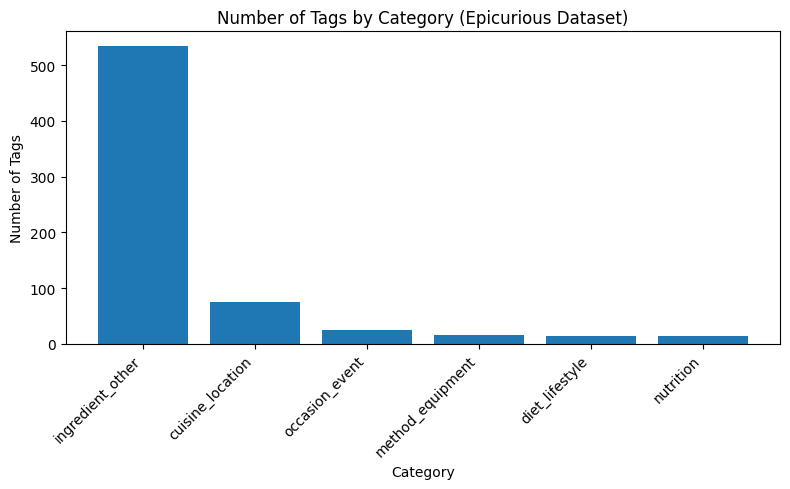

In [28]:
# Get summary counts
summary = tag_map["category"].value_counts().rename_axis("category").reset_index(name="n_tags")

# Plot
plt.figure(figsize=(8,5))
plt.bar(summary["category"], summary["n_tags"])
plt.xlabel("Category")
plt.ylabel("Number of Tags")
plt.title("Number of Tags by Category (Epicurious Dataset)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




*   Keep your nutrition + grocery integration as the main deliverable (MVP).
*   If time allows, layer in “cuisine” and “occasion” metadata. You don’t even need a complex model — simple tag filtering can demonstrate the value.


for example: get vegetarian Mexican recipes with <= 400 calories
User says they’re vegetarian → filter vegetarian == 1.
User wants Mexican cuisine → filter mexico == 1.
User has a calorie limit → filter calories <= X.

then:
filtered = df[
    (df["vegetarian"] == 1) &
    (df["mexico"] == 1) &
    (df["calories"] <= 400)
]



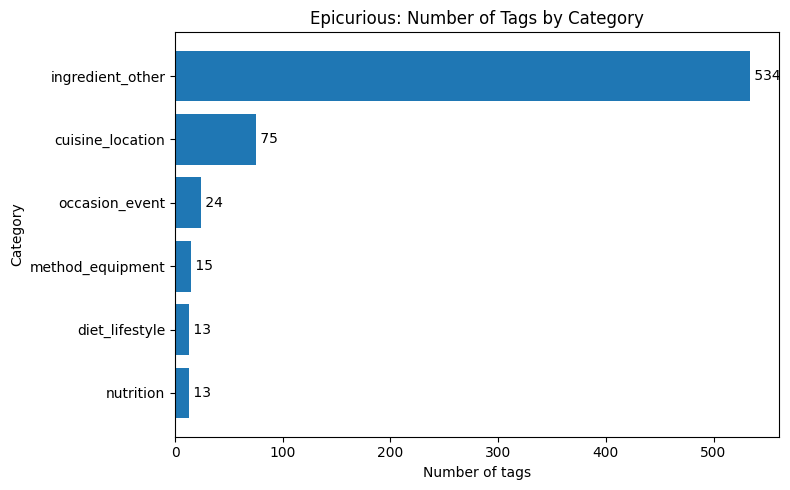

Saved figure to: /content/drive/MyDrive/MIDS_main/DS210/eda_tag_category_counts.png


In [29]:
# Build the summary table
# summary = (
#     tag_map["category"]
#     .value_counts()
#     .rename_axis("category")
#     .reset_index(name="n_tags")
# )

# --- Matplotlib bar chart: sorted, with count labels, saved to Drive ---
# import matplotlib.pyplot as plt

# sort by count ascending for a clean horizontal bar chart
summary_sorted = summary.sort_values("n_tags", ascending=True)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(summary_sorted["category"], summary_sorted["n_tags"])

# labels & title
ax.set_xlabel("Number of tags")
ax.set_ylabel("Category")
ax.set_title("Epicurious: Number of Tags by Category")

# put the counts at the end of each bar
for i, v in enumerate(summary_sorted["n_tags"].tolist()):
    ax.text(v, i, f" {v}", va="center")  # small left padding

plt.tight_layout()
plt.show()

# Adjust path
save_path = "/content/drive/MyDrive/MIDS_main/DS210/eda_tag_category_counts.png"
fig.savefig(save_path, dpi=200)
print("Saved figure to:", save_path)


In [30]:
df[['protein', 'sodium', 'calories', 'title', 'fat', 'rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   protein   14470 non-null  float64
 1   sodium    14501 non-null  float64
 2   calories  14502 non-null  float64
 3   title     18251 non-null  object 
 4   fat       14450 non-null  float64
 5   rating    18251 non-null  float64
dtypes: float64(5), object(1)
memory usage: 855.6+ KB


In [31]:
#  recipe-level tag counts

# tags actually present in the dataframe (safe intersection)
tag_cols_in_df = [t for t in tag_map["tag"] if t in df.columns]

# total tags per recipe
df["n_tags_total"] = df[tag_cols_in_df].sum(axis=1)

# tags per recipe by category
by_cat_counts = {}
for cat, group in tag_map.groupby("category"):
    cols = [t for t in group["tag"] if t in df.columns]
    if cols:
        by_cat_counts[cat] = df[cols].sum(axis=1)

tag_counts = pd.DataFrame(by_cat_counts)
tag_counts["n_tags_total"] = df["n_tags_total"]

# quick look
tag_counts.describe()


,cuisine_location,diet_lifestyle,ingredient_other,method_equipment,nutrition,occasion_event,n_tags_total
count,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000
mean,0.045313,2.767684,7.976220,0.495151,0.643362,0.388143,12.315873
std,0.226411,3.222362,2.533368,0.600836,1.049400,0.779265,5.000142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,8.000000
50%,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,12.000000
75%,0.000000,6.000000,10.000000,1.000000,1.000000,1.000000,16.000000
max,2.000000,11.000000,23.000000,4.000000,9.000000,11.000000,37.000000


In [34]:
# how many recipes have at least one tag in each category
(cat_coverage := (tag_counts.drop(columns=["n_tags_total"]) > 0).mean().sort_values(ascending=False))

,0
ingredient_other,0.999726
diet_lifestyle,0.529450
method_equipment,0.443757
nutrition,0.370062
occasion_event,0.267218
cuisine_location,0.041313


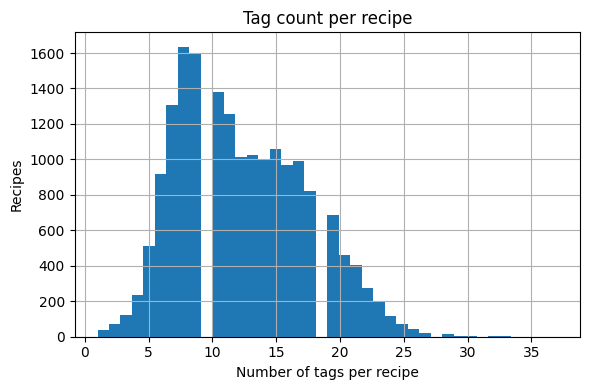

In [35]:
#  distribution of total tags per recipe
plt.figure(figsize=(6,4))
df["n_tags_total"].hist(bins=40)
plt.xlabel("Number of tags per recipe")
plt.ylabel("Recipes")
plt.title("Tag count per recipe")
plt.tight_layout()
plt.show()


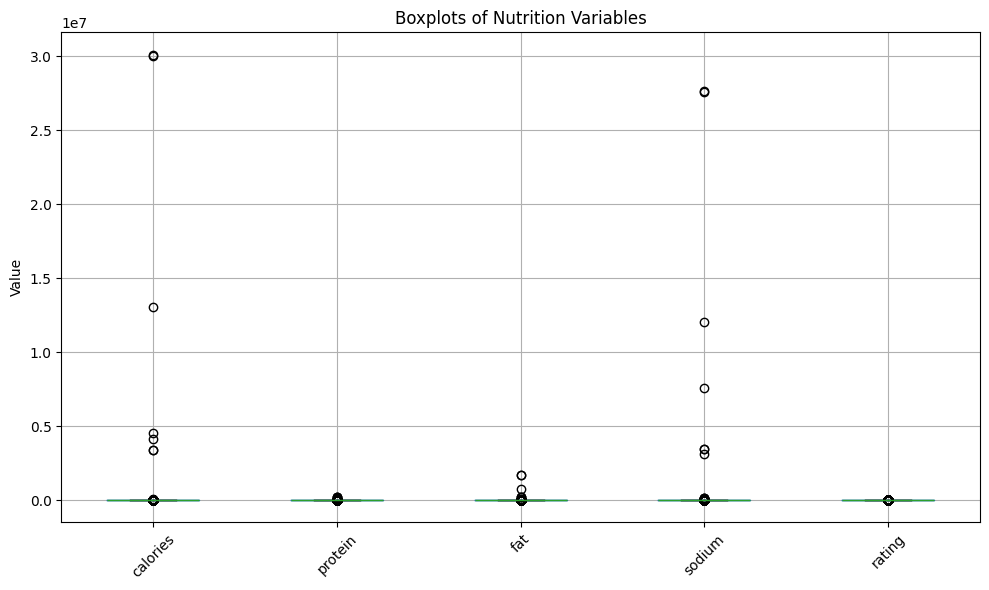

Saved: /content/drive/MyDrive/MIDS_main/DS210/eda_tag_category_counts.png


In [36]:
# --- save folder once ---
save_folder = "/content/drive/MyDrive/MIDS_main/DS210"

num_cols = ["calories", "protein", "fat", "sodium", "rating"]

plt.figure(figsize=(10, 6))
df[num_cols].boxplot()
plt.title("Boxplots of Nutrition Variables")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bar_path = f"{save_folder}/eda_tag_category_counts.png"
fig.savefig(bar_path, dpi=200)
print("Saved:", bar_path)

In [37]:
for col in ["calories", "protein", "fat", "sodium"]:
    print(f"\n{col} summary:")
    print(df[col].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))
    print("Top 5 values:", df[col].nlargest(5).values)



calories summary:
count    1.450200e+04
mean     6.622096e+03
std      3.747819e+05
min      0.000000e+00
50%      3.450000e+02
75%      5.990000e+02
90%      9.579000e+02
95%      1.323900e+03
99%      3.309820e+03
max      3.011122e+07
Name: calories, dtype: float64
Top 5 values: [30111218. 29997918. 13062948.  4518216.  4157357.]

protein summary:
count     14470.000000
mean         92.227920
std        3511.756255
min           0.000000
50%           9.000000
75%          28.000000
90%          53.000000
95%          76.000000
99%         171.000000
max      236489.000000
Name: protein, dtype: float64
Top 5 values: [236489. 200968. 200210. 166471.  87188.]

fat summary:
count    1.445000e+04
mean     3.633945e+02
std      2.135770e+04
min      0.000000e+00
50%      1.800000e+01
75%      3.400000e+01
90%      6.100000e+01
95%      8.600000e+01
99%      2.140000e+02
max      1.722763e+06
Name: fat, dtype: float64
Top 5 values: [1722763. 1716279.  747374.  221495.  186660.]

sodium s

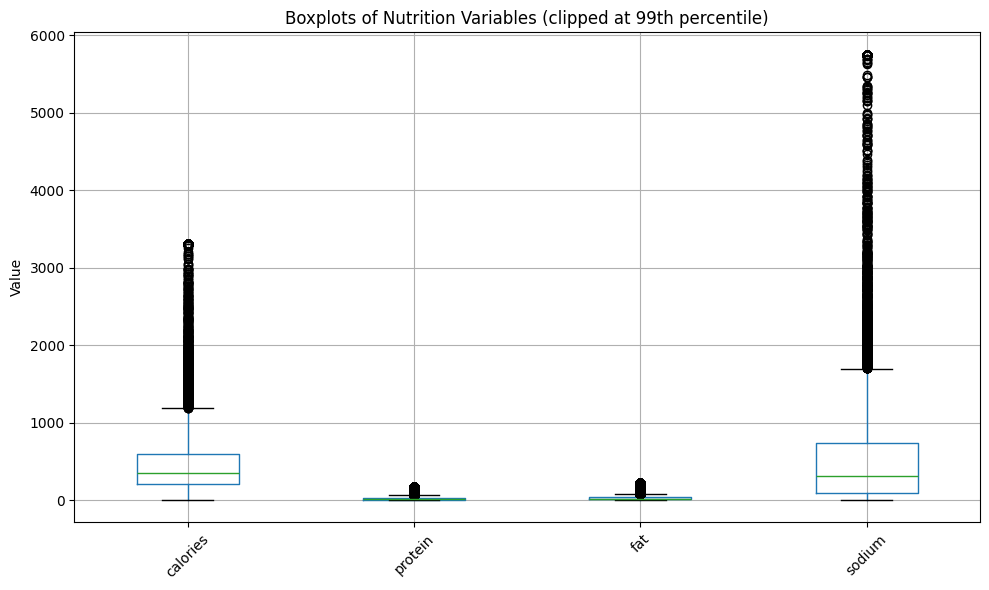

In [38]:

nutri_cols = ["calories", "protein", "fat", "sodium"]

# Clip at 99th percentile
df_clipped = df[nutri_cols].copy()
for col in nutri_cols:
    upper = np.nanpercentile(df[col], 99)
    df_clipped[col] = np.clip(df[col], None, upper)

plt.figure(figsize=(10, 6))
df_clipped.boxplot()
plt.title("Boxplots of Nutrition Variables (clipped at 99th percentile)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


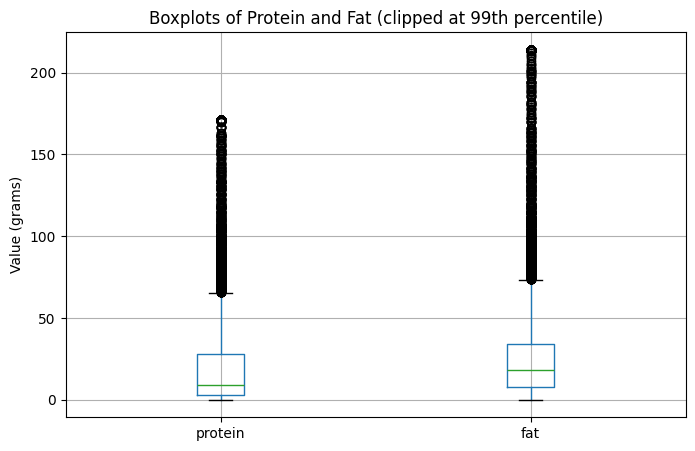

In [39]:
plt.figure(figsize=(8, 5))
df_clipped[["protein", "fat"]].boxplot()
plt.title("Boxplots of Protein and Fat (clipped at 99th percentile)")
plt.ylabel("Value (grams)")
plt.show()


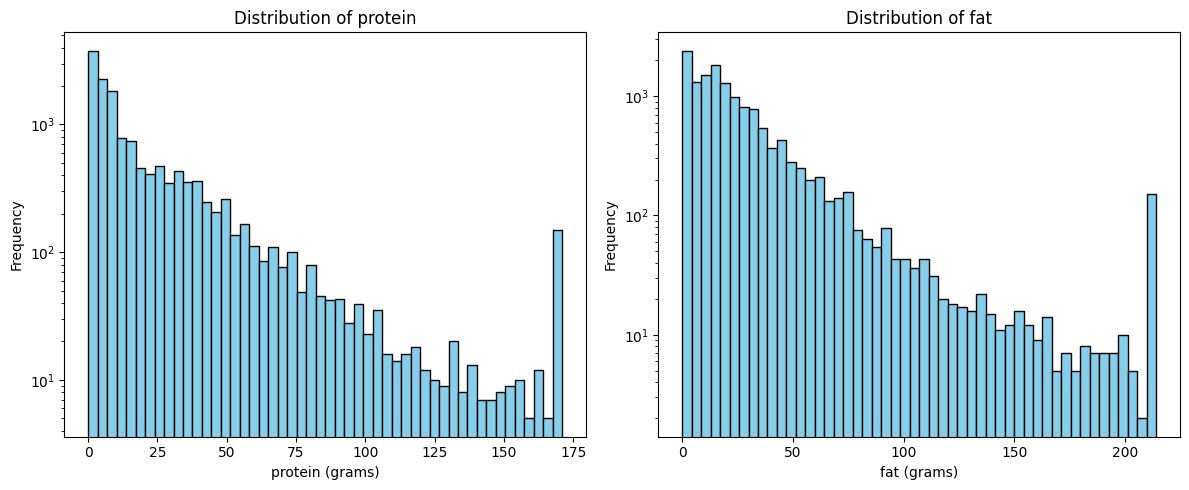

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, col in zip(axes, ["protein", "fat"]):
    ax.hist(df_clipped[col].dropna(), bins=50, color="skyblue", edgecolor="black")
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(f"{col} (grams)")
    ax.set_ylabel("Frequency")
    ax.set_yscale("log")  # helps with long tails

plt.tight_layout()
plt.show()

In [41]:
# looking for outliers
df[df['protein']>1000]

df[df['title'].str.contains('Rice Pilaf with Lamb, Carrots, and Raisins', case=False, na=False)] # there are duplicates

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_tags_total
1293,"Rice Pilaf with Lamb, Carrots, and Raisins",5.0,4157357.0,236489.0,221495.0,3134853.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0


In [42]:
# get duplicate titles with a single call
# Option A: value_counts with explicit names
dup_titles = (
    df['title']
      .value_counts()                      # Series: index=title, values=count
      .rename_axis('title')                # name the index
      .reset_index(name='count')           # turn values into 'count' column
      .query('count > 1')                  # keep only duplicates
      .sort_values('count', ascending=False, ignore_index=True)
)

print(dup_titles.head(20))
print(f"Total duplicate recipe titles: {len(dup_titles)}")


                     title  count
0           Chicken Stock      16
1            Pastry Dough      15
2     Turkey Giblet Stock      11
3            Turkey Stock       8
4            Simple Syrup       8
5               French 75       7
6             Salsa Verde       7
7             Pizza Dough       6
8         Vegetable Stock       6
9         Raspberry Sauce       5
10  Root Vegetable Gratin       5
11        Tomatillo Salsa       5
12       White Fish Stock       5
13     Pickled Red Onions       5
14         Tomato Chutney       4
15        Chocolate Glaze       4
16          Avocado Salsa       4
17      Horseradish Cream       4
18  Buttermilk Corn Bread       4
19          Tortilla Soup       4
Total duplicate recipe titles: 364


In [43]:
#  Inspect all rows of a given duplicate title
target = "Pastry Dough"
block = df[df['title'].str.strip().eq(target)]
block


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_tags_total
126,Pastry Dough,5.000,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1072,Pastry Dough,0.000,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
1166,Pastry Dough,4.375,287.0,4.0,19.0,128.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
1240,Pastry Dough,5.000,1405.0,17.0,96.0,597.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2070,Pastry Dough,5.000,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3307,Pastry Dough,5.000,233.0,3.0,16.0,196.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3663,Pastry Dough,5.000,276.0,3.0,19.0,120.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5863,Pastry Dough,5.000,1405.0,17.0,96.0,597.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
7585,Pastry Dough,3.750,234.0,3.0,16.0,99.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
7735,Pastry Dough,3.750,1405.0,17.0,96.0,597.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [44]:
# EXACT DUPLICATES WERE ADDRESSED 9/21


# # See all truly duplicated rows (identical across all columns)
# dupe_rows = df[df.duplicated(keep=False)].sort_values(['title'])
# dupe_rows.head(20)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,n_tags_total


In [45]:
# look for likely carb columns
carb_candidates = [c for c in df.columns if any(k in c.lower() for k in [
    "carb", "carbo", "carbohyd", "net carb", "total carb"
])]
print("Carb-ish columns:", carb_candidates)

# peek at types/values if any were found
if carb_candidates:
    display(df[carb_candidates].head())
    print(df[carb_candidates].dtypes)


Carb-ish columns: ['low carb']


,low carb
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


low carb    float64
dtype: object


## Method: Carbohydrate by difference
Yes, if a recipe dataset contains nutrition values for calories, protein, and fat, the total carbohydrate content can be estimated with reasonable accuracy. This is done using a calculation known as "carbohydrate by difference". Method: Carbohydrate by difference This method leverages the fact that total calories come almost entirely from three macronutrients: protein, fat, and carbohydrates. By calculating the calories from the known protein and fat values, you can subtract them from the total calorie count to find the calories from carbohydrates, and then convert that figure to grams. The formula and steps: Recall the caloric values per gram for each macronutrient:Protein: 4 calories per gram.Fat: 9 calories per gram.Carbohydrates: 4 calories per gram.Calculate calories from protein and fat:Calories from Protein = (grams of protein) * 4Calories from Fat = (grams of fat) * 9Find calories from carbohydrates:Calories from Carbs = (Total Calories) - (Calories from Protein) - (Calories from Fat)Convert carbohydrate calories to grams:Grams of Carbs = (Calories from Carbs) / 4 Example calculation Suppose a recipe has the following nutritional information per serving: Total Calories: 300Protein: 20gFat: 15g Here is how to estimate the carbs: Calculate calories from protein and fat:Calories from protein: \(20\text{g}\times 4=80\) caloriesCalories from fat: \(15\text{g}\times 9=135\) caloriesFind calories from carbs:Calories from carbs: \(300-80-135=85\) caloriesConvert carb calories to grams:Grams of carbs: $85 / 4 = 21.25$g Considerations and limitations Rounding and accuracy: Be aware that rounding can affect the final estimate, as nutrition labels often use rounded values. Some analyses may also factor in alcohol, which provides 7 calories per gram.Fiber content: This method estimates total carbohydrates, which includes dietary fiber. *For low-carb diets, where "net carbs" are important, this method may not be specific enough. Net carbs require subtracting fiber from the total carbohydrate count.Ingredient data: A more precise approach is to calculate the nutrition facts by summing the known values of all individual ingredients.* This method, however, is dependent on having complete data for each component of the recipe

https://gym-mikolo.com/blogs/home-gym/how-to-calculate-calories-from-carbohydrates-proteins-and-fats#:~:text=Carbohydrates:%201%20gram%20=%204%20calories,the%20following%20in%20a%20meal:

https://www.ars.usda.gov/ARSUserFiles/80400525/Articles/jfca10_102-114.pdf

In [46]:
# Assumes 4 kcal/g for protein & carbs, 9 kcal/g for fat; ignore alcohol.
# We’ll set negative estimates to NaN and optionally clip for cleaner plots.
nutri_cols = ["calories","protein","fat","sodium"]
assert all(c in df.columns for c in ["calories","protein","fat"]), "Missing one of calories/protein/fat."

# Estimated carbs (g) by energy balance
carbs_est = (df["calories"] - (4*df["protein"] + 9*df["fat"])) / 4.0
carbs_est = carbs_est.mask(carbs_est < 0, np.nan)  # drop impossible negatives

df["carbs_est_g"] = carbs_est
print(df[["calories","protein","fat","carbs_est_g"]].describe(percentiles=[.5,.9,.95,.99]))

           calories        protein           fat   carbs_est_g
count  1.450200e+04   14470.000000  1.445000e+04  1.435000e+04
mean   6.622096e+03      92.227920  3.633945e+02  7.566021e+02
std    3.747819e+05    3511.756255  2.135770e+04  4.342358e+04
min    0.000000e+00       0.000000  0.000000e+00  0.000000e+00
50%    3.450000e+02       9.000000  1.800000e+01  2.900000e+01
90%    9.579000e+02      53.000000  6.100000e+01  7.750000e+01
95%    1.323900e+03      76.000000  8.600000e+01  9.950000e+01
99%    3.309820e+03     171.000000  2.140000e+02  2.245150e+02
max    3.011122e+07  236489.000000  1.722763e+06  3.450620e+06


In [47]:
fiber_col = next((c for c in df.columns if c.lower() == "fiber"), None)
if fiber_col is not None:
    df["net_carbs_est_g"] = (df["carbs_est_g"] - df[fiber_col]).mask(lambda s: s < 0, np.nan)


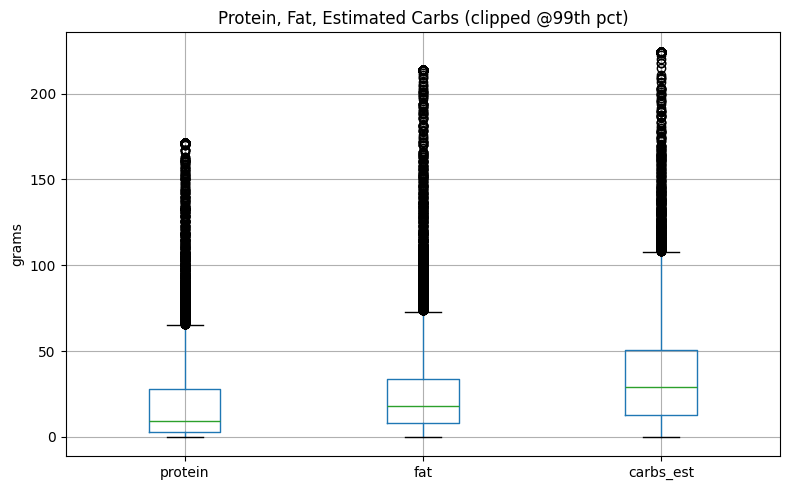

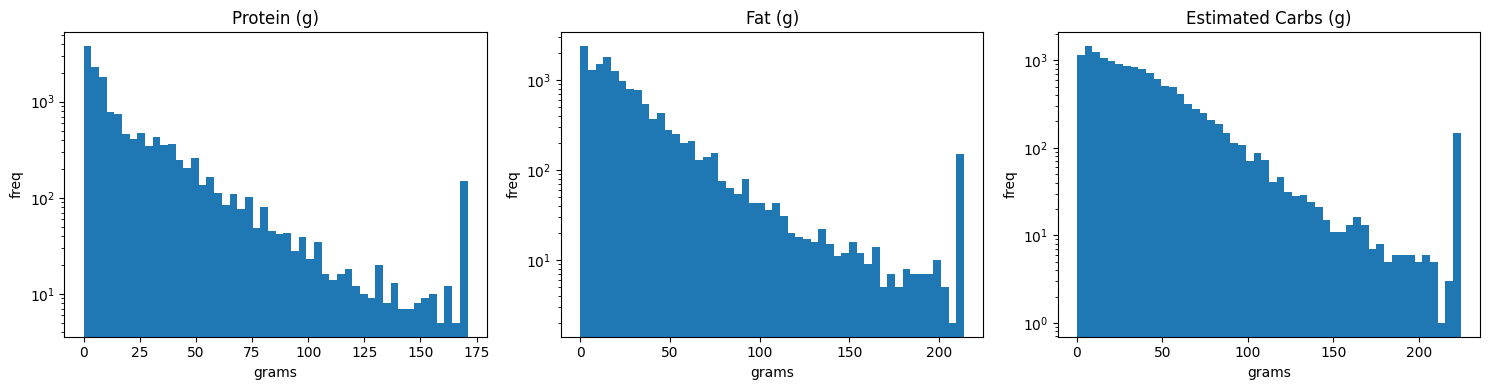

In [48]:
# Add carbs_est_g and clip at 99th percentile for protein/fat/carbs
for col in ["protein","fat","carbs_est_g"]:
    if col in df.columns:
        upper = np.nanpercentile(df[col], 99)
        df[f"{col}_clipped"] = np.clip(df[col], None, upper)

# Boxplots just for protein, fat, carbs
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df[["protein_clipped","fat_clipped","carbs_est_g_clipped"]].boxplot()
plt.title("Protein, Fat, Estimated Carbs (clipped @99th pct)")
plt.ylabel("grams")
plt.xticks([1,2,3], ["protein","fat","carbs_est"])
plt.tight_layout()
plt.show()

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col, label in zip(
    axes,
    ["protein_clipped","fat_clipped","carbs_est_g_clipped"],
    ["Protein (g)","Fat (g)","Estimated Carbs (g)"]
):
    ax.hist(df[col].dropna(), bins=50)
    ax.set_title(label)
    ax.set_xlabel("grams"); ax.set_ylabel("freq")
    ax.set_yscale("log")  # helps with skew
plt.tight_layout()
plt.show()


                  n  median_carbs     p90       p99
low carb                                           
not low carb  14104          29.5  78.000  229.1525
low carb        246           7.0  18.875   59.6875


/tmp/ipython-input-42202282.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data0, data1], labels=["not low carb", "low carb"])


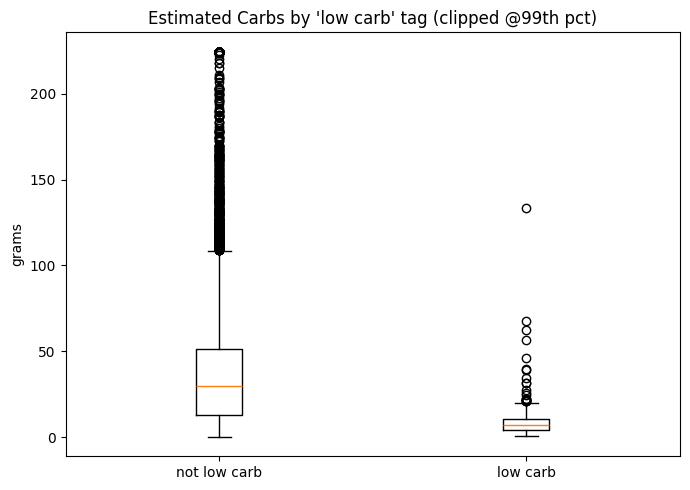

In [49]:
# verify that recipes tagged low carb have lower estimated carbs:

low_carb_col = "low carb" if "low carb" in df.columns else None
if low_carb_col:
    grp = df.groupby(df[low_carb_col].fillna(0)).agg(
        n=("carbs_est_g","count"),
        median_carbs=("carbs_est_g","median"),
        p90=("carbs_est_g", lambda x: np.nanpercentile(x,90)),
        p99=("carbs_est_g", lambda x: np.nanpercentile(x,99))
    )
    grp.index = grp.index.map({0:"not low carb", 1:"low carb"})
    print(grp)

    # Side-by-side boxplot by tag (using clipped carbs)
    data0 = df.loc[df[low_carb_col]==0, "carbs_est_g_clipped"].dropna()
    data1 = df.loc[df[low_carb_col]==1, "carbs_est_g_clipped"].dropna()

    plt.figure(figsize=(7,5))
    plt.boxplot([data0, data1], labels=["not low carb", "low carb"])
    plt.title("Estimated Carbs by 'low carb' tag (clipped @99th pct)")
    plt.ylabel("grams")
    plt.tight_layout()
    plt.show()
else:
    print("No 'low carb' tag column found.")


What “residual” means here

Using the (Atwater) energy factors:

protein: 4 kcal/g

fat: 9 kcal/g

carbs: 4 kcal/g

alcohol (if you have grams of alcohol): 7 kcal/g

Let:

𝑃
P = protein (g),
𝐹
F = fat (g),
𝐶
C = carbs (g),
𝐴
A = alcohol (g), and Cal = calories (kcal).

1) “PF residual” — calories not explained by fat or protein

This is what you just asked about:

residual_PF

=

Cal
−
(
4
𝑃
+
9
𝐹
)
residual_PF=Cal−(4P+9F)

Interpretation:

If you don’t have alcohol grams, then

residual_PF
≈
4
𝐶

(
+
residual_PF≈4C(+ rounding/error
)
).

If you do have alcohol grams
𝐴
A, then

residual_PF
≈
4
𝐶
+
7
𝐴

(
+
residual_PF≈4C+7A(+ rounding/error
)
).

So yes: it’s “the calories that are not fat or protein.” In practice it’s mostly carbs (and alcohol, if present).

2) “Full residual” — after accounting for P, F, and carbs

If you compute carbs from the same equation:

𝐶
est

=

Cal
−
(
4
𝑃
+
9
𝐹

[
+
7
𝐴
]
)
4
,
C
est
	​

=
4
Cal−(4P+9F[+7A])
	​

,

then a full residual

Cal

−

(
4
𝑃
+
9
𝐹
+
4
𝐶
est

[
+
7
𝐴
]
)
Cal−(4P+9F+4C
est
	​

[+7A])

will be exactly 0 by construction (up to floating-point rounding). That’s why you saw all zeros earlier — we used
𝐶
est
C
est
	​

 derived from the same identity.

What to compute for diagnostics

Use residual_PF to see “calories not from protein or fat.”
This is meaningful even when you estimate carbs later.

Optionally, if you have numeric alcohol grams, compute

residual_PFA
=
Cal
−
(
4
𝑃
+
9
𝐹
+
7
𝐴
)
residual_PFA=Cal−(4P+9F+7A)
which isolates 4·carbs (+ noise).

In [50]:
# Detect alc related columns
# Two things are happening:

# Residual = 0 is expected because we defined carbs_est_g from the same energy equation we used to compute the residual. So it cancels out algebraically → not a diagnostic.

# The column alcoholic you “auto-picked” is a 0/1 tag, not grams. Because it’s float (0.0/1.0), our earlier picker treated it as numeric grams and plugged it into 7 * df['alcoholic'] — wrong.

# helper: is a series binary 0/1 (even if float/bool/strings)?
def is_binary_series(s: pd.Series) -> bool:
    s = s.dropna()
    if s.empty:
        return False
    vals = pd.unique(s)
    try:
        # normalize to ints when possible
        norm = set(int(v) if str(v).strip() in {"0","1"} or isinstance(v, (np.integer, np.bool_, bool, int, float)) and v in (0,1) else v
                   for v in vals)
    except Exception:
        return False
    return norm.issubset({0,1})

# find alcohol *grams* columns (NOT tags)
raw_alc_candidates = [c for c in df.columns if re.search(r"(alcohol|ethanol)", c, flags=re.I)]
alc_num_col = None
for c in raw_alc_candidates:
    if pd.api.types.is_numeric_dtype(df[c]) and not is_binary_series(df[c]):
        alc_num_col = c
        break
print("Alcohol grams column detected:", alc_num_col)  # likely None in epi_r.csv

# compute carbs by energy balance (Atwater)
assert all(c in df.columns for c in ["calories","protein","fat"])
if alc_num_col:
    carbs_est = (df["calories"] - (4*df["protein"] + 9*df["fat"] + 7*df[alc_num_col])) / 4.0
else:
    carbs_est = (df["calories"] - (4*df["protein"] + 9*df["fat"])) / 4.0

# drop impossible negatives
df["carbs_est_g"] = carbs_est.mask(carbs_est < 0, np.nan)

# sanity check that's independent of carbs_est_g:
# compare calories vs (4*P + 9*F) only (ignores carbs & alcohol)
df["calories_minus_PF"] = df["calories"] - (4*df["protein"] + 9*df["fat"])
print(df[["calories","protein","fat","calories_minus_PF"]]
      .describe(percentiles=[.5,.9,.95,.99]))



Alcohol grams column detected: None
           calories        protein           fat  calories_minus_PF
count  1.450200e+04   14470.000000  1.445000e+04       1.444700e+04
mean   6.622096e+03      92.227920  3.633945e+02       3.006064e+03
std    3.747819e+05    3511.756255  2.135770e+04       1.731104e+05
min    0.000000e+00       0.000000  0.000000e+00      -5.700000e+01
50%    3.450000e+02       9.000000  1.800000e+01       1.150000e+02
90%    9.579000e+02      53.000000  6.100000e+01       3.100000e+02
95%    1.323900e+03      76.000000  8.600000e+01       3.980000e+02
99%    3.309820e+03     171.000000  2.140000e+02       8.922400e+02
max    3.011122e+07  236489.000000  1.722763e+06       1.380248e+07


In [51]:
#  compute carbs estimate (including alcohol)
# How to use the alcoholic tag properly

# Keep it only for segmentation, not as grams:

if "alcoholic" in df.columns:
    grp = df.groupby(df["alcoholic"].fillna(0)).agg(
        n=("carbs_est_g","count"),
        median_carbs=("carbs_est_g","median"),
        p90=("carbs_est_g", lambda x: np.nanpercentile(x,90)),
        p99=("carbs_est_g", lambda x: np.nanpercentile(x,99)),
    )
    grp.index = grp.index.map({0:"non-alcoholic", 1:"alcoholic"})
    print(grp)


                   n  median_carbs    p90     p99
alcoholic                                        
non-alcoholic  13769         27.75  77.75  229.41
alcoholic        581         45.00  73.00  166.90


What to compute for diagnostics

Use residual_PF to see “calories not from protein or fat.”
This is meaningful even when you estimate carbs later.

Optionally, if you have numeric alcohol grams, compute

residual_PFA
=
Cal
−
(
4
𝑃
+
9
𝐹
+
7
𝐴
)
residual_PFA=Cal−(4P+9F+7A)


which isolates 4·carbs (+ noise).

In [52]:
# Residual calories sanity check
# If alcohol grams are missing,
# ignoring alcohol will underestimate carbs in alcoholic recipes. This residual shows how well the energy equation balances.

# Calories not from protein or fat (≈ carbs + alcohol + rounding)
df["residual_PF"] = df["calories"] - (4*df["protein"] + 9*df["fat"])

# If you had alcohol grams in, say, df["alcohol_g"], use:
# df["residual_PFA"] = df["calories"] - (4*df["protein"] + 9*df["fat"] + 7*df["alcohol_g"])

# Quick look
df[["calories","protein","fat","residual_PF"]].describe(percentiles=[.5,.9,.95,.99])

"""
Sanity checks you can do

Negative residual_PF → inconsistent row (P4 + F9 > calories). We already mask negative carbs estimates; you can also flag these rows.

Very large residual_PF → likely a bad calorie or macro entry.
"""



'\nSanity checks you can do\n\nNegative residual_PF → inconsistent row (P4 + F9 > calories). We already mask negative carbs estimates; you can also flag these rows.\n\nVery large residual_PF → likely a bad calorie or macro entry.\n'

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Columns: 687 entries, title to residual_PF
dtypes: float64(686), object(1)
memory usage: 95.7+ MB


In [54]:
# titles = df['title'].dropna().unique()
# [m for m in titles if "Rice Pilaf" in m]


In [55]:
# import numpy as np
# import pandas as pd

def iqr_outlier_split(
    df: pd.DataFrame,
    cols: list[str] | None = None,
    factor: float = 2,
    how: str = "any",  # "any" or "all"
):
    """
    Split df into outliers and clean sets using Tukey fences per selected column.
    Returns: outliers_df, clean_df, bounds_df
    """
    # choose columns
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # compute per-column bounds
    stats = {}
    for c in cols:
        s = df[c]
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        if pd.isna(iqr) or iqr == 0:
            lower, upper = -np.inf, np.inf
        else:
            lower = q1 - factor * iqr
            upper = q3 + factor * iqr
        stats[c] = {"Q1": q1, "Q3": q3, "IQR": iqr, "lower": lower, "upper": upper}

    bounds_df = pd.DataFrame(stats).T

    # build per-column masks
    mask_df = pd.DataFrame(index=df.index)
    for c in cols:
        lo, hi = bounds_df.loc[c, ["lower", "upper"]]
        mask_df[c] = (df[c] < lo) | (df[c] > hi)

    # combine masks
    if how == "any":
        row_mask = mask_df.any(axis=1)
    elif how == "all":
        row_mask = mask_df.all(axis=1)
    else:
        raise ValueError("how must be 'any' or 'all'")

    outliers_df = df.loc[row_mask].copy()
    if not outliers_df.empty:
        outliers_df["outlier_cols"] = (
            mask_df.loc[row_mask]
                   .apply(lambda r: [c for c, v in r.items() if bool(v)], axis=1)
        )

    clean_df = df.loc[~row_mask].copy()

    return outliers_df, clean_df, bounds_df

In [56]:
cols_to_check = ["calories", "protein", "fat", "sodium", "rating"]
outliers_df, clean_df, bounds_df = iqr_outlier_split(df, cols=cols_to_check, factor=2.0, how="any")

In [57]:
print("shape:", outliers_df.shape)
outliers_df[cols_to_check].describe()

shape: (3312, 688)


,calories,protein,fat,sodium,rating
count,2.773000e+03,2755.000000,2.742000e+03,2.773000e+03,3312.000000
mean,3.298772e+04,419.673684,1.824202e+03,3.260665e+04,1.891229
std,8.566959e+05,8041.060246,4.900956e+04,7.963425e+05,2.047026
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.040000e+02,3.000000,6.000000e+00,9.000000e+01,0.000000
50%,5.970000e+02,23.000000,3.000000e+01,6.270000e+02,0.000000
75%,1.356000e+03,78.000000,8.800000e+01,2.116000e+03,4.375000
max,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,5.000000


In [58]:
outliers_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,snack week,turkey,n_tags_total,carbs_est_g,protein_clipped,fat_clipped,carbs_est_g_clipped,calories_minus_PF,residual_PF,outlier_cols
16,Sweet Buttermilk Spoon Breads,1.875,146.0,4.0,5.0,160.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,21.25,4.0,5.0,21.25,85.0,85.0,[rating]
25,Garlic Baguette Crumbs,0.000,95.0,1.0,7.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,7.00,1.0,7.0,7.00,28.0,28.0,[rating]
36,Pastry Twists with Spiced Sugar-Honey Glaze,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,[rating]
42,Honey Rye,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,[rating]
53,Pancetta Roast Chicken with Walnut Stuffing,5.000,1203.0,89.0,87.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,16.00,89.0,87.0,16.00,64.0,64.0,"[protein, fat]"


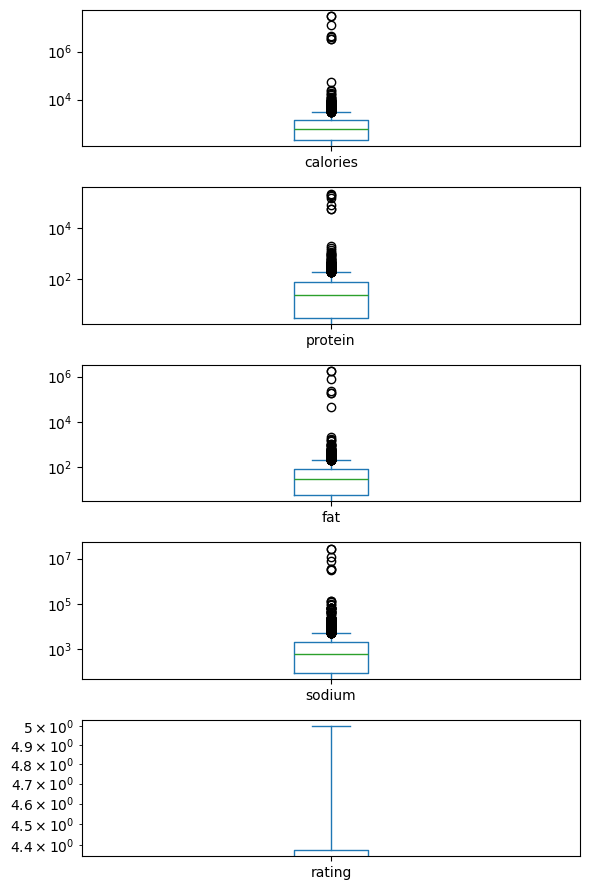

In [59]:
use_cols = ["calories", "protein", "fat", "sodium", "rating"]

axes = outliers_df[use_cols].plot.box(
    subplots=True,
    layout=(len(use_cols), 1),   # one column per row
    figsize=(6, 1.8 * len(use_cols)),
    sharey=False,
    logy=True                    # log scale helps with skew
)
plt.tight_layout()
plt.show()

In [60]:
# 1) rows that are outliers in CALORIES specifically (using your bounds_df)
lo, hi = bounds_df.loc["calories", ["lower", "upper"]]
cal_mask = (df["calories"] < lo) | (df["calories"] > hi)
cal_out = df.loc[cal_mask, "calories"].dropna()

print(cal_out.describe(percentiles=[.5,.9,.95,.99]))

count    6.670000e+02
mean     1.355628e+05
std      1.743804e+06
min      1.388000e+03
50%      1.935000e+03
90%      5.210200e+03
95%      6.975900e+03
99%      1.177708e+06
max      3.011122e+07
Name: calories, dtype: float64


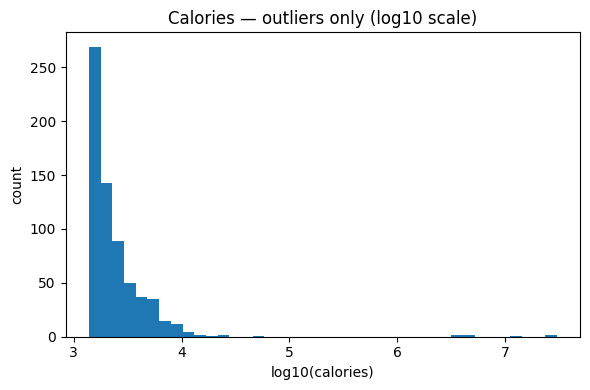

In [61]:
# option 2
pos = cal_out[cal_out > 0]  # log needs positive
plt.figure(figsize=(6,4))
plt.hist(np.log10(pos), bins=40)
plt.title("Calories — outliers only (log10 scale)")
plt.xlabel("log10(calories)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [62]:
# tmp as a new dataset
# De-duplicate by title with a smart tie-breaker (keep “best” row)

tmp = df.copy()
# how many NaNs across key nutrition fields
nutri = ['calories','protein','fat','sodium']
tmp['nutri_n_missing'] = tmp[nutri].isna().sum(axis=1)

# sort so the best row comes first within each title
tmp = tmp.sort_values(
    by=['title', 'rating', 'nutri_n_missing'],
    # by=['title', 'nutri_n_missing', 'rating'],
    ascending=[True, False, True]
)

# drop duplicates by title, keep the first (best) row
df_deduped = tmp.drop_duplicates(subset=['title'], keep='first').drop(columns=['nutri_n_missing']).reset_index(drop=True)

print("Original rows:", len(df))
print("After de-dup by title:", len(df_deduped))

# If you’d rather keep the row with most complete nutrition regardless of rating, flip the sort keys accordingly.

Original rows: 18251
After de-dup by title: 17736
